In [65]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [66]:
# def threshold(img,value):
#     th=np.zeros_like(img)
#     for i in range (img.shape[0]):
#         for j in range (img.shape[1]):
#             if(img[i,j]>value):
#                 th[i,j]=255
#             else:
#                 th[i,j]=0
#     return th
# th=threshold(gauss_filter,120)
# plt.imshow(th,cmap='gray')
# plt.show()

# PROCCESING

(955, 1899, 3)


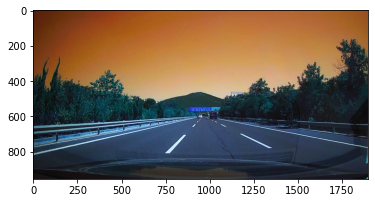

In [67]:
img=cv2.imread('samples/test_image_2.jpg',1) #8

print(img.shape)
plt.imshow(img)
plt.show()


(1000, 1900, 3)


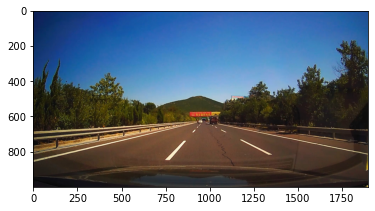

In [68]:
img=cv2.resize(img,(1900,1000))
print (img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_process=np.copy(img)
plt.imshow(img_process)
plt.show()

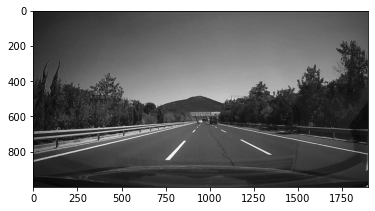

In [69]:
gray=cv2.cvtColor(img_process,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()


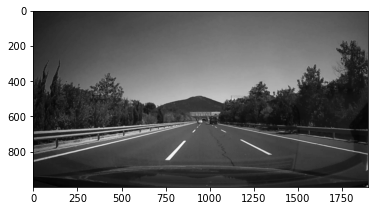

In [70]:
kernel=5
gauss_filter = cv2.GaussianBlur(gray,(kernel,kernel),3)
plt.imshow(gauss_filter,cmap='gray')
plt.show()


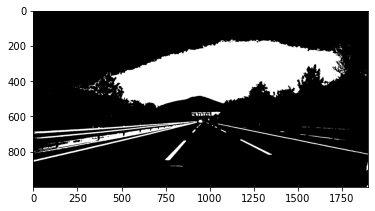

In [71]:
limite=120
ret,bin=cv2.threshold(gauss_filter,limite,255,cv2.THRESH_BINARY )
plt.imshow(bin,cmap='gray')
plt.show()

# Cropping

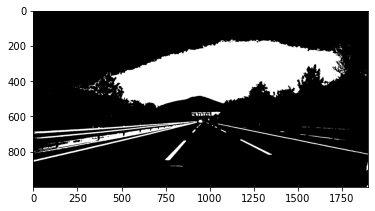

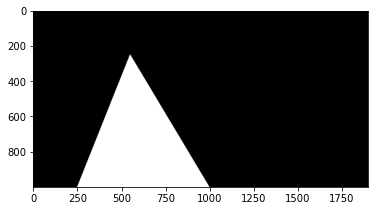

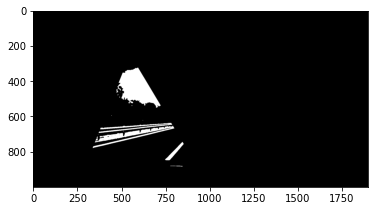

In [72]:
mask=bin.copy()
plt.imshow(mask,cmap='gray')
plt.show()

height = mask.shape[0]
polygons = np.array([
[(250, height), (1000, height), (550, 250)]
])
roi = np.zeros_like(mask)
cv2.fillPoly(roi, polygons, 255)

plt.imshow(roi,cmap='gray')
plt.show()

mask_roi=cv2.bitwise_and(mask, roi)
plt.imshow(mask_roi,cmap='gray')
plt.show()

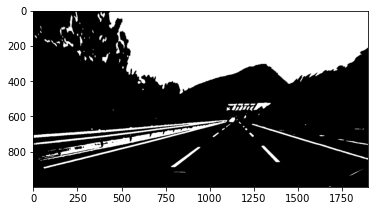

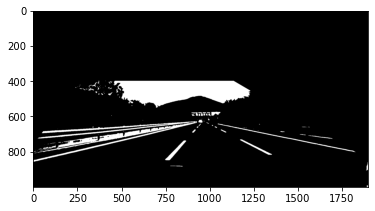

In [73]:
src = np.float32(
    [[200, mask.shape[0]],
    [400,400],
    [700,400],
    [1000,mask.shape[0]]])
dst = np.float32(
    [[300,mask.shape[0]],
    [300,0],
    [950,0],
    [950,mask.shape[0]]])

M =  cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)
img_warped = cv2.warpPerspective(mask, M, mask.shape[1::-1], flags=cv2.INTER_LINEAR)
img_warped_inv=cv2.warpPerspective(img_warped, M_inv, img_warped.shape[1::-1], flags=cv2.INTER_LINEAR)

plt.imshow(img_warped,cmap='gray')
plt.show()
plt.imshow(img_warped_inv,cmap='gray')
plt.show()